### This repository contains CAD files for a 4" wafer to be fabricated the week of 02/02/25

This is an Nb on Si wafer, sputtered by Matt Chalk and Mihir at SLAC. We will use an etching process with positive-tone resist.

One quarter of the wafer will contain 1/4 wave CPW resonators designed by Chou-Wei for the mergemon project
3/4 of the wafer will contain cavity resonators for Matt

In [4]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import numpy as np



In [5]:
# now, let's construct the wafer
# from mattresonator import MattResonator, BlankSquares
import copy
in4_wafer_neg = Device()
in4_wafer_neg << pg.circle(radius=50000, layer=0) # just for reference

writable_radius = 45000 # 5 mm buffer around wafer edge



# Add Matt's resonators
default = {'cpl': 2.5e3,
          'L': 14e3,
          'w1': 10,
          'w2': 400,
          'd1': 10,
          'd2': 1200,
         'rel_pos': 12.8e3,
         'right_offset' : 0} # in um

blank_params = {'size': 7000}

matt_res_params = []

for i in range(9):
    amended_default = copy.deepcopy(default)
   
    amended_default['L'] = int(default['L']*(1+.015*i))
    #$print(amended_default['L'])
    matt_res_params += [amended_default]

res_count = 0
resonator_x_space = 4100 # 7 mm chip + 0.5 mm dicing lane

#TRIPOLES
# for i in range(18):

#     params = matt_res_params[res_count%len(matt_res_params)]
#     if i < 9:
#         dicing = True
#     else:
#         dicing = False
#     matt_res = MattResonator(params=params, type_num = res_count, dicing = dicing)
#     print("instantiating resonator with params: ", params)
#     res_count += 1

    
#     in4_wafer_neg << matt_res.move((matt_res.xsize/2 - 100 + i*resonator_x_space-writable_radius+10000, 0))

#BLANKS
blank_x_arr = np.array([-22000]*8)
blank_y_arr =np.array([34000]*8)
blank_x_arr = blank_x_arr - blank_params['size']/2
blank_y_arr = blank_y_arr - blank_params['size']/2

blank_x_arr = [blank_x_arr[i] + (i) * (blank_params['size'] ) for i in range(len(blank_x_arr))]


#print('hi',blank_x_arr)
metal_arr = [True, True, True, True, False, False, False, False]
for i in range(len(blank_x_arr)):
    blank_square = BlankSquares(metal = metal_arr[i])
    in4_wafer_neg << blank_square.move((blank_x_arr[i], blank_y_arr[i]))
resonator_LL_y_offset = -matt_res.ysize/2 + 50 + 10025

#COHERENCE RESONATORS
blank_x_arr = np.array([-31000]*10)
blank_y_arr =np.array([27000]*10)
blank_x_arr = blank_x_arr - 7000/2
blank_y_arr = blank_y_arr - 7000/2

blank_x_arr = [blank_x_arr[i] + (i) * (blank_params['size']) for i in range(len(blank_x_arr))]
for i in range(len(blank_x_arr)):
    coh_res_raw = pg.import_gds("center_feedline_resonator_5.gds",) # here, the properly booleaned CAD is in layer 100
    coh_res_pos = pg.copy_layer(coh_res_raw, layer = 5, new_layer=12)
    coh_res_bbox = pg.rectangle(size=(7000, 7000), layer=13).move((-7000/2, -7000/2))
    #coh_res_neg = pg.boolean(coh_res_bbox, coh_res_pos, operation='A-B', layer=11)
    #qp(coh_res_pos)

    dicing_lane_width = 0
    xmax = coh_res_bbox.xmax 
    xmin = coh_res_bbox.xmin
    ymax = coh_res_bbox.ymax
    ymin = coh_res_bbox.ymin
    coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width/2, ymax + dicing_lane_width/2))
    coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmax+ dicing_lane_width/2, ymin - dicing_lane_width/2))
    coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width/2, ymax + dicing_lane_width/2))
    coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width/2, ymin - dicing_lane_width/2))
    #in4_wafer_neg << coh_res_neg.move((blank_x_arr[0], blank_y_arr[0]))
    in4_wafer_neg << coh_res_pos.move((blank_x_arr[i]+3500, blank_y_arr[i]+3500))
    in4_wafer_neg << coh_res_bbox.move((blank_x_arr[i]+3500, blank_y_arr[i]+3500))
resonator_LL_y_offset = -matt_res.ysize/2 + 50 + 10025

in4_wafer_neg.write_gds("optical_7_9_25_with_dicing.gds")
qp(in4_wafer_neg)

NameError: name 'BlankSquares' is not defined

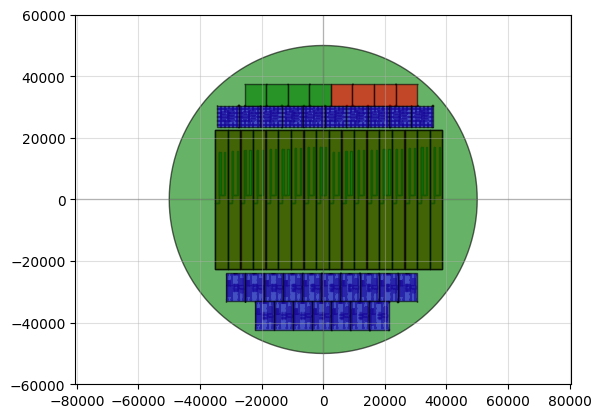

In [3]:
blank_x_arr = np.array([-25000+i*(200 + 6000) for i in range(10)])
blank_y_arr =np.array([25000]*10)*-1
blank_x_arr = blank_x_arr - blank_params['size']/2
blank_y_arr = blank_y_arr - blank_params['size']/2

for i in range(len(blank_x_arr)):
    mergemon_res_raw = pg.import_gds("SMMS04_res_forfab.gds") # here, the properly booleaned CAD is in layer 100
    mergemon_res_pos = pg.copy_layer(mergemon_res_raw, layer = 100, new_layer=12)
    mergemon_res_bbox = pg.rectangle(size=(mergemon_res_pos.xsize, mergemon_res_pos.ysize), layer=13).move((-mergemon_res_pos.xsize/2, -mergemon_res_pos.ysize/2))
    mergemon_res_neg = pg.boolean(mergemon_res_bbox, mergemon_res_pos, operation='A-B', layer=9)
    

    dicing_lane_width = 200
    xmax = mergemon_res_bbox.xmax 
    xmin = mergemon_res_bbox.xmin
    ymax = mergemon_res_bbox.ymax
    ymin = mergemon_res_bbox.ymin
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmax + dicing_lane_width/2, ymax + dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmax+ dicing_lane_width/2, ymin - dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmin - dicing_lane_width/2, ymax + dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmin - dicing_lane_width/2, ymin - dicing_lane_width/2))
    in4_wafer_neg << mergemon_res_neg.move((blank_x_arr[i], blank_y_arr[i]))
    dice_box = pg.rectangle(size=(mergemon_res_pos.xsize+dicing_lane_width, mergemon_res_pos.ysize+dicing_lane_width), layer=13).move((-mergemon_res_pos.xsize/2-+dicing_lane_width/2, -mergemon_res_pos.ysize/2-+dicing_lane_width/2))
    in4_wafer_neg << dice_box.move((blank_x_arr[i], blank_y_arr[i]))
    
blank_x_arr = blank_x_arr[2:-1]-3000
blank_y_arr = blank_y_arr[2:-1]-( 9000+200)

for i in range(len(blank_x_arr)):
    mergemon_res_raw = pg.import_gds("SMMS04_res_forfab.gds") # here, the properly booleaned CAD is in layer 100
    mergemon_res_pos = pg.copy_layer(mergemon_res_raw, layer = 100, new_layer=12)
    mergemon_res_bbox = pg.rectangle(size=(mergemon_res_pos.xsize, mergemon_res_pos.ysize), layer=13).move((-mergemon_res_pos.xsize/2, -mergemon_res_pos.ysize/2))
    mergemon_res_neg = pg.boolean(mergemon_res_bbox, mergemon_res_pos, operation='A-B', layer=9)
    

    dicing_lane_width = 200
    xmax = mergemon_res_bbox.xmax 
    xmin = mergemon_res_bbox.xmin
    ymax = mergemon_res_bbox.ymax
    ymin = mergemon_res_bbox.ymin
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmax + dicing_lane_width/2, ymax + dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmax+ dicing_lane_width/2, ymin - dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmin - dicing_lane_width/2, ymax + dicing_lane_width/2))
    mergemon_res_neg << pg.cross(length=200, width=100, layer=3).move((xmin - dicing_lane_width/2, ymin - dicing_lane_width/2))
    in4_wafer_neg << mergemon_res_neg.move((blank_x_arr[i], blank_y_arr[i]))
    dice_box = pg.rectangle(size=(mergemon_res_pos.xsize+dicing_lane_width, mergemon_res_pos.ysize+dicing_lane_width), layer=13).move((-mergemon_res_pos.xsize/2-+dicing_lane_width/2, -mergemon_res_pos.ysize/2-+dicing_lane_width/2))
    in4_wafer_neg << dice_box.move((blank_x_arr[i], blank_y_arr[i]))

in4_wafer_neg.write_gds("optical_7_9_25_with_dicing.gds")
qp(in4_wafer_neg)

In [4]:
# coh_res_raw = pg.import_gds("center_feedline_resonator_5.gds",) # here, the properly booleaned CAD is in layer 100
# coh_res_pos = pg.copy_layer(coh_res_raw, layer = 5, new_layer=12)
# coh_res_bbox = pg.rectangle(size=(coh_res_pos.xsize, coh_res_pos.ysize), layer=13).move((-coh_res_pos.xsize/2, -coh_res_pos.ysize/2))
# #coh_res_neg = pg.boolean(coh_res_bbox, coh_res_pos, operation='A-B', layer=11)
# qp(coh_res_pos)

# dicing_lane_width = 200
# xmax = coh_res_bbox.xmax 
# xmin = coh_res_bbox.xmin
# ymax = coh_res_bbox.ymax
# ymin = coh_res_bbox.ymin
# coh_res_pos << pg.cross(length=150, width=30, layer=3).move((xmax + dicing_lane_width/2, ymax + dicing_lane_width/2))
# coh_res_pos << pg.cross(length=150, width=30, layer=3).move((xmax+ dicing_lane_width/2, ymin - dicing_lane_width/2))
# coh_res_pos << pg.cross(length=150, width=30, layer=3).move((xmin - dicing_lane_width/2, ymax + dicing_lane_width/2))
# coh_res_pos << pg.cross(length=150, width=30, layer=3).move((xmin - dicing_lane_width/2, ymin - dicing_lane_width/2))
# #in4_wafer_neg << coh_res_neg.move((blank_x_arr[0], blank_y_arr[0]))
# in4_wafer_neg << coh_res_pos
# in4_wafer_neg.write_gds("optical_7_9_25.gds")
# qp(in4_wafer_neg)